# Hyperparameter Optimization
Evan Komp
DSMCER Guest Lecture 03.03.22
***

### Run below if using this notebook for the first time
*Make sure you have the proper environment activate!*

In [2]:
!conda install -c conda-forge numpy scikit-learn optuna seaborn matplotlib -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.11.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /opt/anaconda3/envs/kerastutorial

  added / updated specs:
    - matplotlib
    - numpy
    - optuna
    - scikit-learn
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    alembic-1.7.6              |     pyhd8ed1ab_0         136 KB  conda-forge
    autopage-0.5.0             |     pyhd8ed1ab_0          26 KB  conda-forge
    certifi-2021.5.30          |   py36h79c6626_0         141 KB  conda-forge
    cliff-3.10.1               |     pyhd8ed1ab_0          53 KB  conda-forge
    cmaes-0.8.2                |     pyh44b312d_0          16 KB  conda-forge
    cmd2-2.2.0                 |   py36h79c6626_0         194 KB  conda-for

***
### Imports

In [3]:
# data handling
import numpy as np
import sklearn.datasets

# metrics
import sklearn.metrics

#plotting
import matplotlib.pyplot as plt

# hyperparameter optimization
import optuna
import sklearn.model_selection
import sklearn.preprocessing

***
## Why optimize hyperparameters?

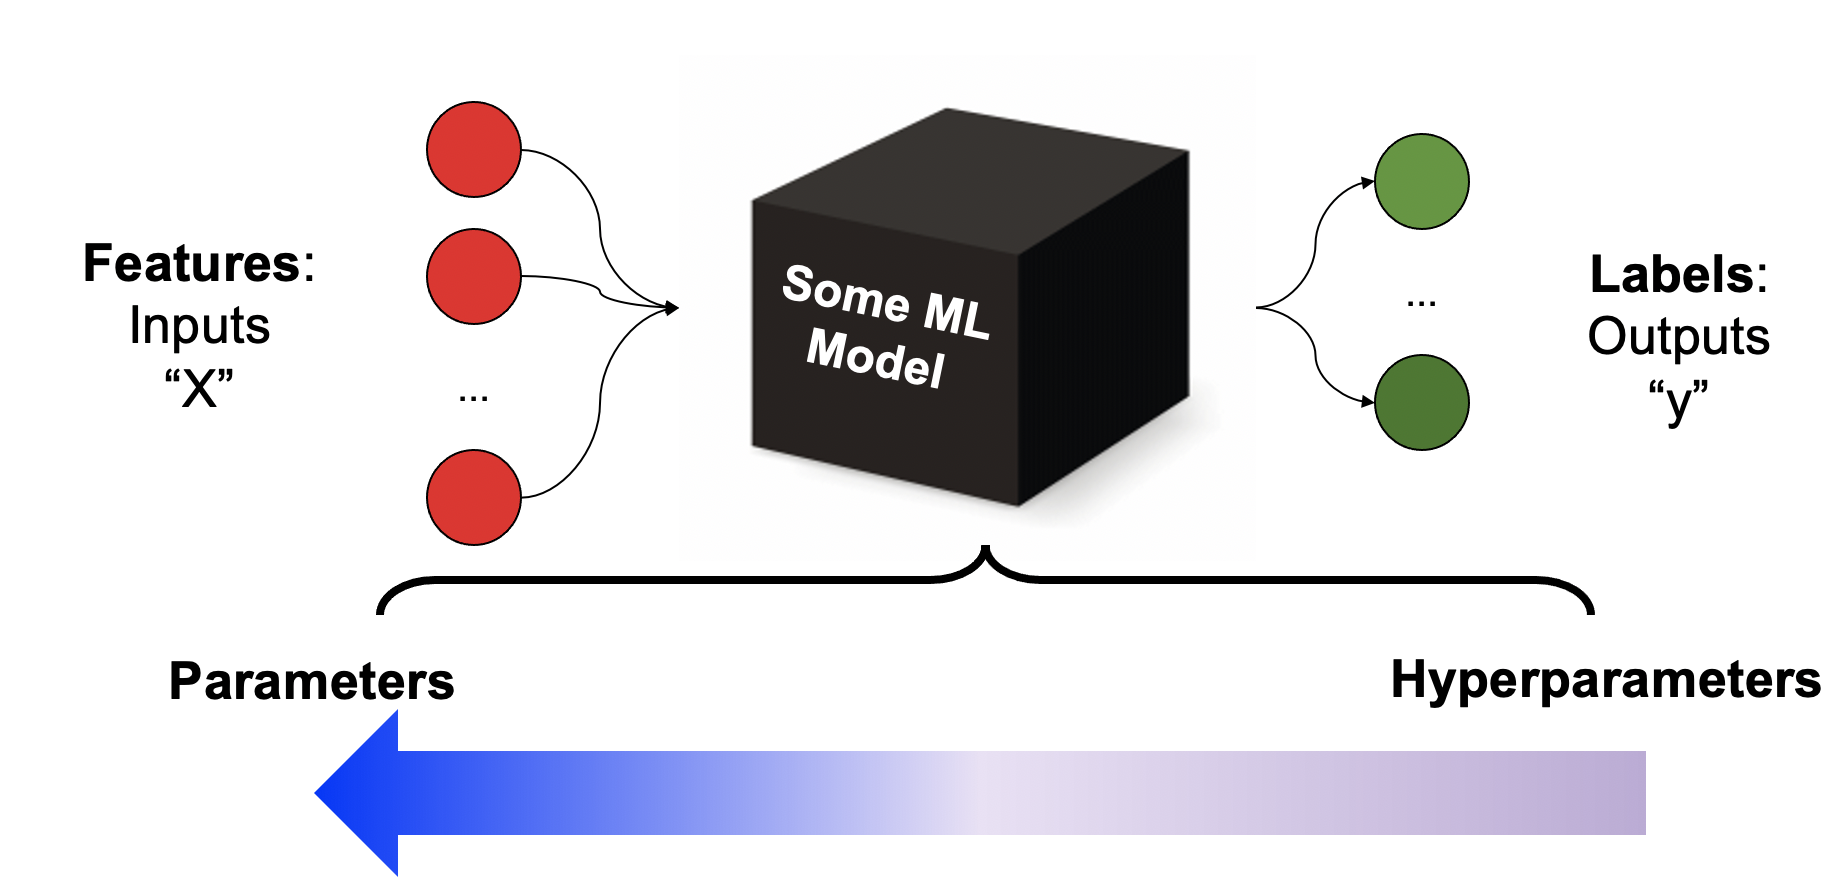

In math, we are trying to create a predictor

$$\hat{y} = f(X;\theta,\Omega)$$

for parameters $\theta$ and hyperparamers $\Omega$, such that

$$\textrm{loss}(y,\hat{y})$$

Is optimized.

Now let's say we have some hyperparameters $\Omega$, what is the process of determining the best parameters called? Eg.

$$\theta^* = \textrm{argmin}_\theta [\textrm{loss}(y,f(X;\theta,\Omega)))]$$

How would you do it for a linear regressor?

> This is called training. For a linear regressor, we would use least squares to analytically determine the best coefficients.

## Loss surface

Each model has a loss surface, and the best parameters $\theta^*$ is associated with somewhere on this surface. Here it is shown in the context of DNNs where $w$ are the neuron weights, $b$ are the neuron biases, and $\phi$ are some mapping of these to one dimension. Thus all model parameters $\theta$ are shown in two dimensions.

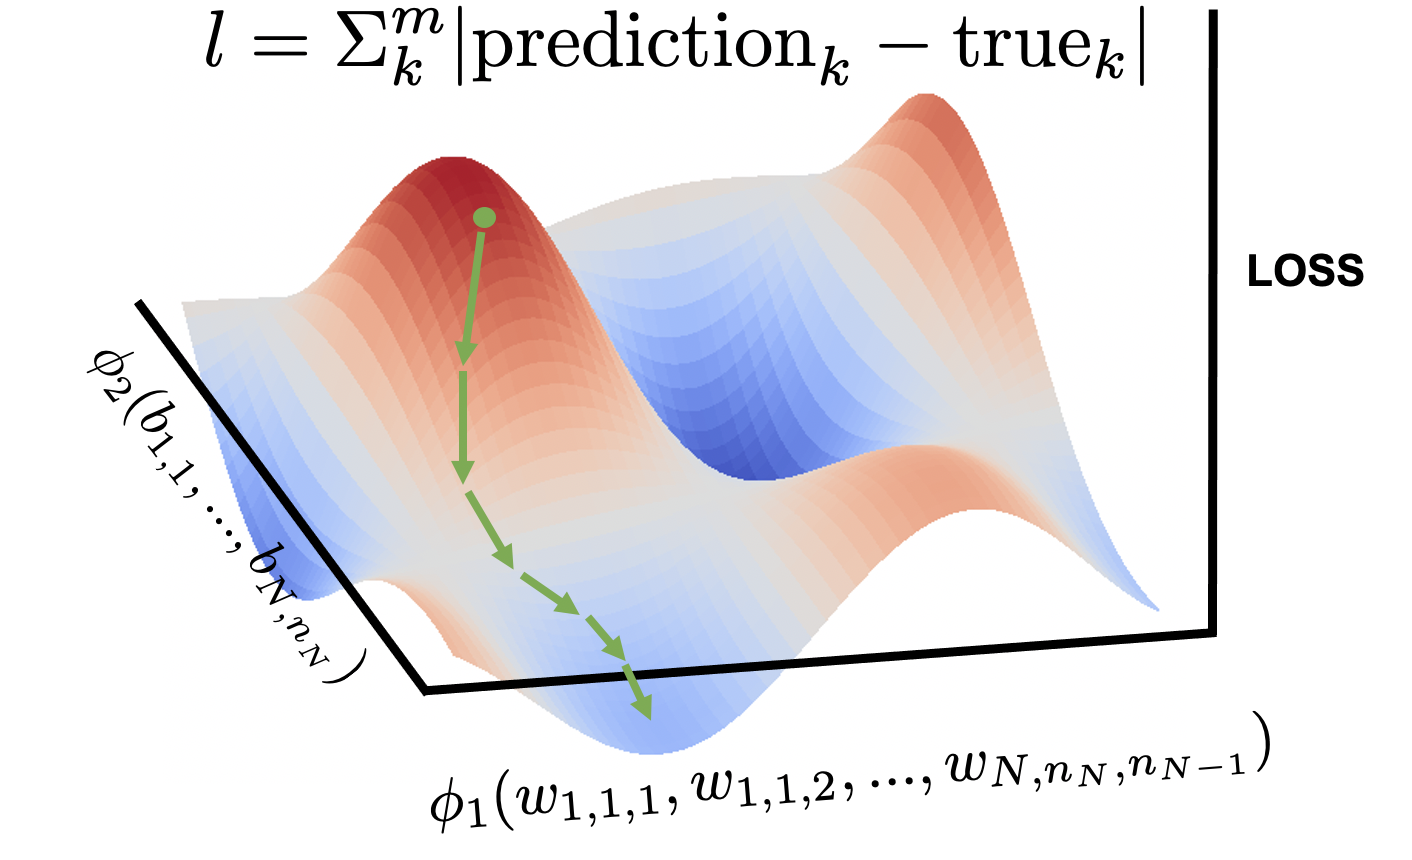

How many dimensions is this surface?

> The loss surface has dimensions equal to the number of parameters

Our goal again is to find the lowest point on this surface. For neural nets, optimizers are used to search this surface for the optimal parameters $\theta^*$ (Green arrows above). Some examples of these are:
- Stochastic Gradient Descent
- RMS Prop
- Adam

We will not dive into the math of any of these, but I encourage you to explore these on your own time. At a high level, all of these are gradient descent models, eg. they change parameters by following the steepest path down this surface.

Critically what does this imply about the loss surface?

> It is differentiable. Neural networks are design so that this is the case - it is a bunch of linear sums and analytical-derivative activation functions.

__Important note__: This loss surface is *deterministic* for some set of data and some set of hyperparameters!

What does this imply about some set of hyperparameters?

> We can evaluate their quality by their loss at the best parameters for that set of hyperparameters. We can imagine a hyperparameter loss surface

We can imagine a "hyperparameter loss surface":

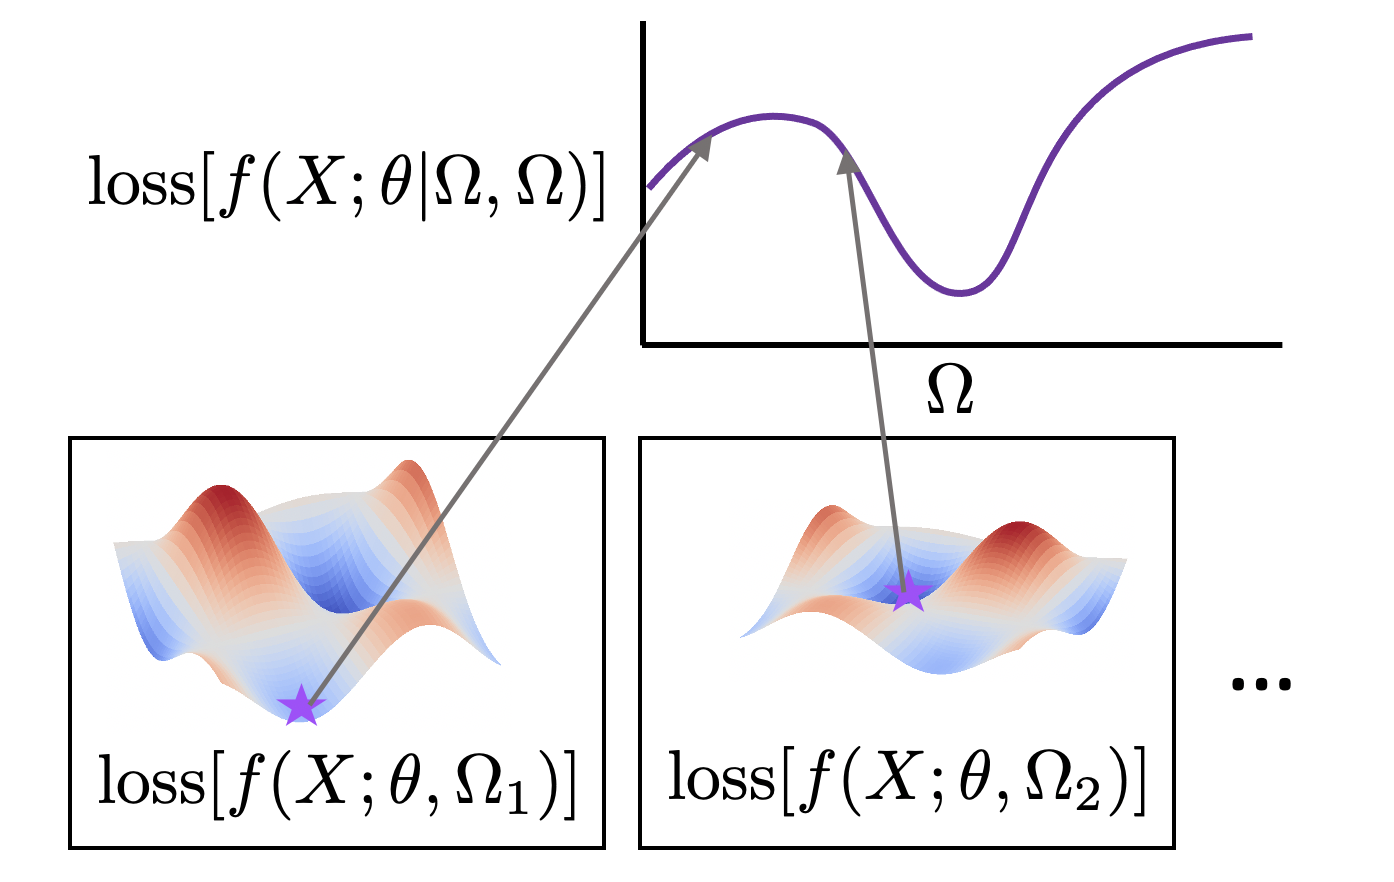